# Image Preprocessing

## Image Cropping
Usually, to ensure that the input images have the same shape, the input images need to be cropped to the same pixel size. The image document provided have the same size of 512×512 pixels, which is good because we don't need further cropping.

## Image Grayscaling
MRI images are grey-scale pictures made up of different signal intensities at different locations. From the image document we can see that the bit depth of the image is 24, which means the document is RGB image. We can convert the image into grayscale images by using the cv2.cvtColor function from OpenCV.

As we need to batch process images, we use the glob package to do this. glob is a file manipulation module that comes with python and lists all the paths in a directory that match the requirements.

In [1]:
# import libraries
# from pandas.tools.plotting import scatter_matrix
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as patches
from scipy.special import expit
import itertools
from PIL import Image
import cv2
import glob
import os.path

In [2]:
def convertjpg(jpgfile,outdir):
    img = cv2.imread(jpgfile,0)
    img = np. array(img)
    new_img = Image.fromarray(img,'L')
    #print(img.shape)
    new_img.save(os.path.join(outdir,os.path.basename(jpgfile)))
for jpgfile in glob.glob(r"./AMLS-2021_dataset/dataset/image/*.jpg"):
    convertjpg(jpgfile, r'./AMLS-2021_dataset/dataset/gray_image/')

## Noise reduction and smoothing
I use the 5x5 Gaussian filter to reduce the noise and smooth the image. The equation below shows the Gaussian filter.
$$G(x,y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$
The original image and smoothened image are shown below.


In [3]:

def smoothjpg(jpgfile,outdir):
    img = cv2.imread(jpgfile,0)
    img = np. array(img)
    new_img = Image.fromarray(cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT),'L')
    new_img.save(os.path.join(outdir,os.path.basename(jpgfile)))
for jpgfile in glob.glob(r"./AMLS-2021_dataset/dataset/gray_image/*.jpg"):
    smoothjpg(jpgfile, r"./AMLS-2021_dataset/dataset/smoothen_image")

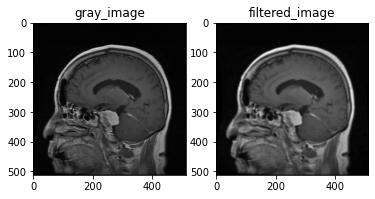

In [4]:
img_gray = cv2.imread(r"./AMLS-2021_dataset/dataset/gray_image/IMAGE_0000.jpg",0)
img_filtered = cv2.imread(r"./AMLS-2021_dataset/dataset/smoothen_image/IMAGE_0000.jpg",0)
img_gray = np. array(img_gray)
#print(img_gray.shape)
img_filtered = np. array(img_filtered)
#print(img_filtered.shape)

f, axarr = plt.subplots(1,2) 
axarr[0].set_title('gray_image')
axarr[1].set_title('filtered_image')
# use the created array to output your multiple images.
axarr[0].imshow(img_gray,cmap='gray')
axarr[1].imshow(img_filtered,cmap='gray')
